<a href="https://colab.research.google.com/github/codedyasai/Python_MachineLearning/blob/main/16_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns= cols)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

In [ ]:
iris_result = iris_df.groupby(['target', 'cluster']).size()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


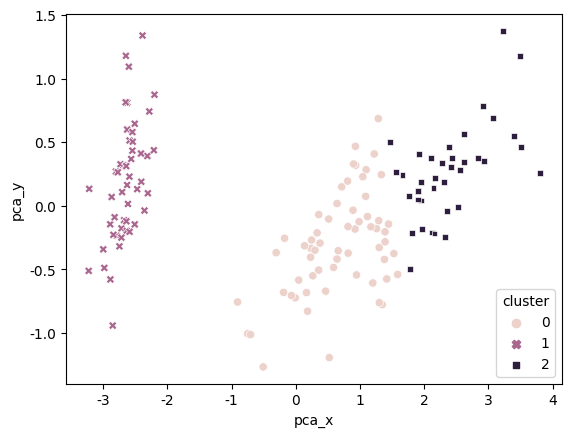

In [ ]:
import seaborn as sns

sns.scatterplot(x='pca_x',y='pca_y',data=iris_df, hue = 'cluster', style = 'cluster')
plt.show()

In [ ]:
pred = kmeans.predict(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

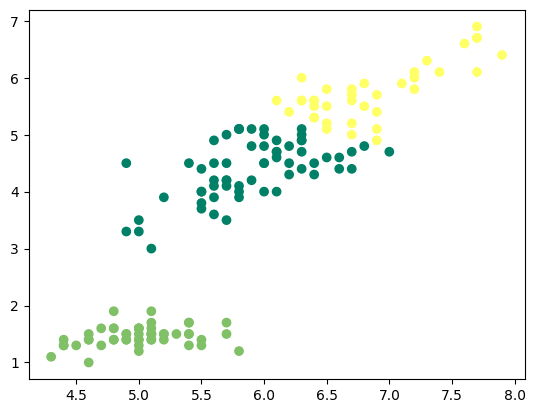

In [ ]:
# 군집결과 시각화
plt.scatter(x= iris_df['sepal_length'], y= iris_df['petal_length'], c= pred, cmap= 'summer')
plt.show()

In [ ]:
# 군집별 중앙값 추출
centers= kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

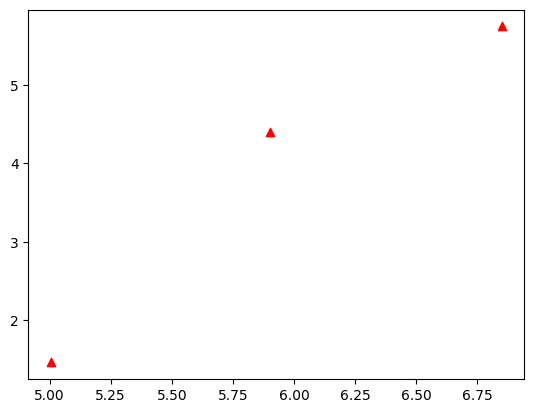

In [ ]:
# 군집별 중앙값 시각화
plt.scatter(x= centers[:, 0], y= centers[:,2], marker = '^', c= 'r' )
plt.show()

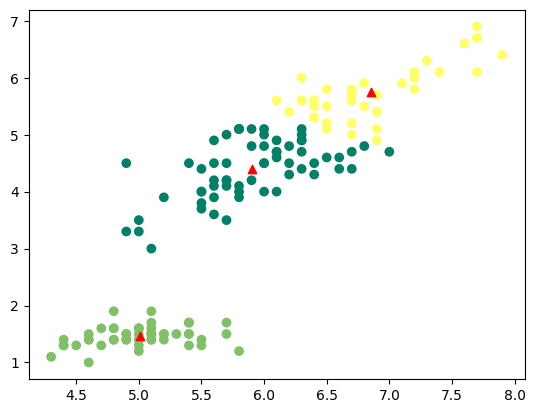

In [ ]:
plt.scatter(x= iris_df['sepal_length'], y= iris_df['petal_length'], c= pred, cmap= 'summer')
plt.scatter(x= centers[:, 0], y= centers[:,2], marker = '^', c= 'r' )
plt.show()

# 확인학습 - 와인분류

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## 데이터프레임으로 변형

In [ ]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns = columns)

print(df.shape)

(178, 13)


In [ ]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


## 적절한 k값을 찾는 방법 - 덴드로그램 시각화

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

clusters_single = linkage(y= data, method= 'single', metric ='euclidean')
clusters_complete = linkage(y= data, method= 'complete', metric ='euclidean')
clusters_average = linkage(y= data, method= 'average', metric ='euclidean')

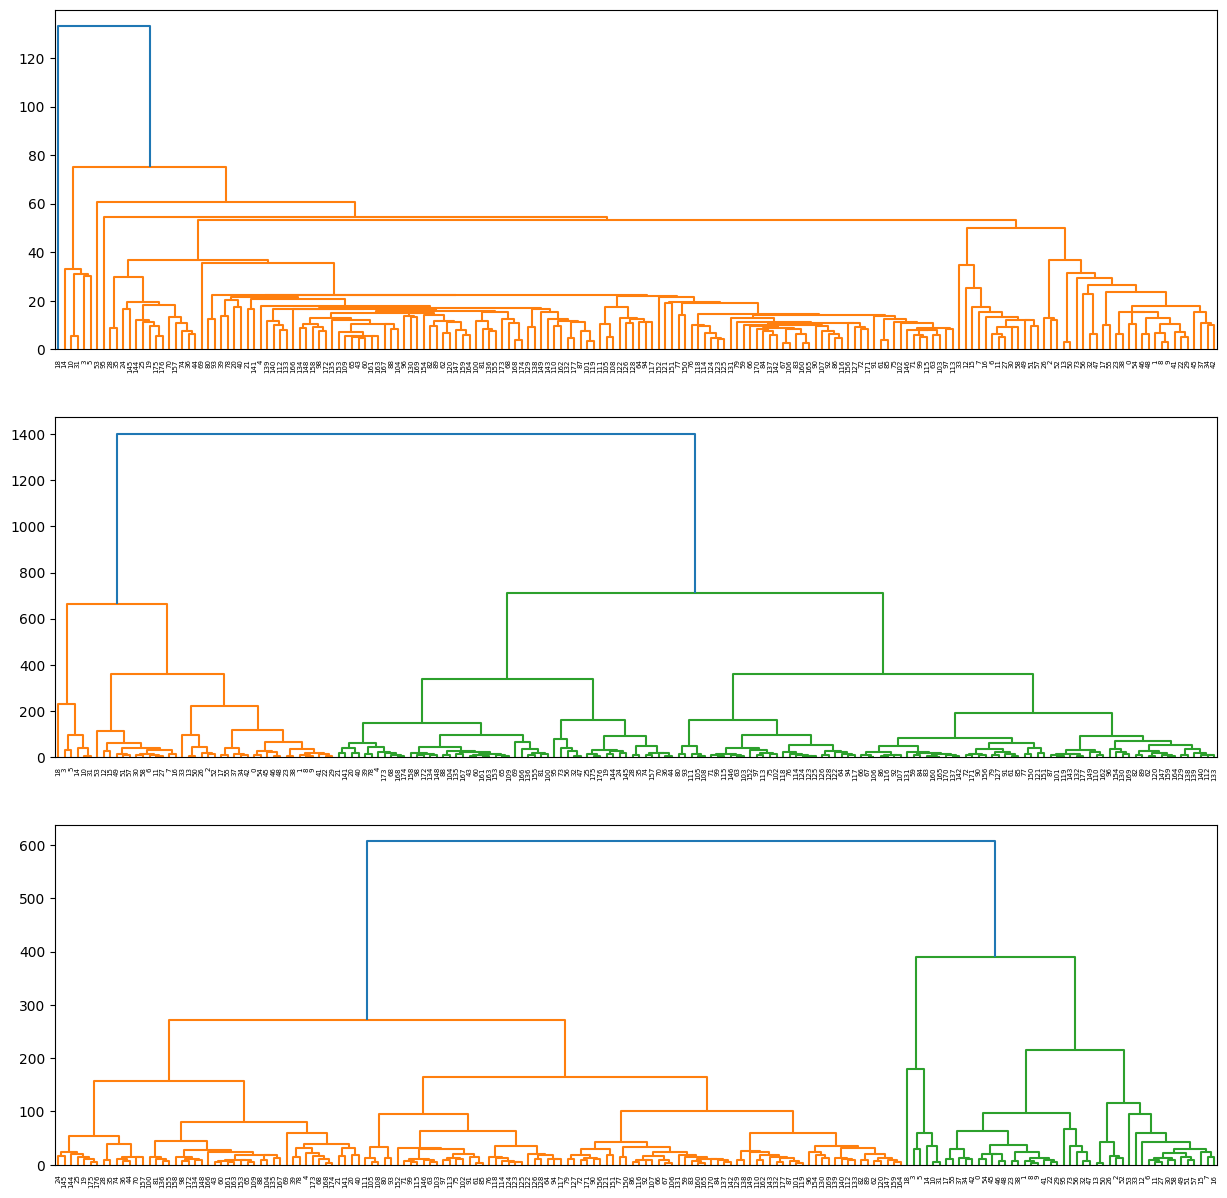

In [ ]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 15)

ax1 = dendrogram(clusters_single, ax= axes[0])
ax2 = dendrogram(clusters_complete, ax= axes[1])
ax3 = dendrogram(clusters_average, ax= axes[2])

plt.show()

- wine 데이터셋은 single linkage는 피해야한다.
- 군집 수는 3또는 4개가 적당해보인다.

## 피처 스케일링과 PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df.loc[:,:] = ss.fit_transform(data)

In [ ]:
df.describe().loc[['mean', 'std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

- n_components의 매개변수의 값에 따라 두 가지 동작을 수행한다.
- 매개변수의 값이 1보다 크면 해당 개수만큼 특성이 반환된다.
- 변동비율 95%, 97% => n_components = 0.95 or 0.99
- whiten = True로 지정하면 각 주성분의 값을 평균 0, 분산 1이 되도록 반환

In [ ]:
data = pca.fit_transform(data)
data.shape

(178, 2)

In [ ]:
# 변동 비율
pca.explained_variance_ratio_

# 58% 밖에 설명을 못한다

array([0.36198848, 0.1920749 ])

In [ ]:
df['pca_x']= data[:, 0]
df['pca_y']= data[:, 1]

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831


## K-Means로 클러스터 찾기

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 3, random_state= 200)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=200)

In [ ]:
cluster = kmeans.predict(data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df['cluster'] = cluster
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,0


<Axes: xlabel='pca_x', ylabel='pca_y'>

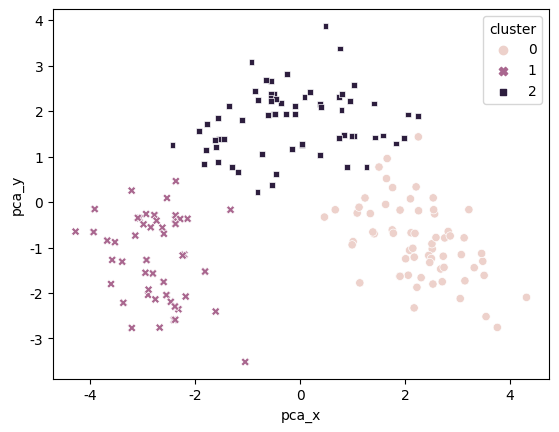

In [ ]:
sns.scatterplot(x= 'pca_x', y= 'pca_y', data= df, hue= 'cluster', style= 'cluster')

## 중심점도 포함한 시각화

In [ ]:
# cluster_centers_: 중심점의 좌표값이 반환된다.
center = kmeans.cluster_centers_
center

array([[ 2.26614991, -0.86559213],
       [-2.74392982, -1.2141906 ],
       [-0.16278513,  1.76758824]])

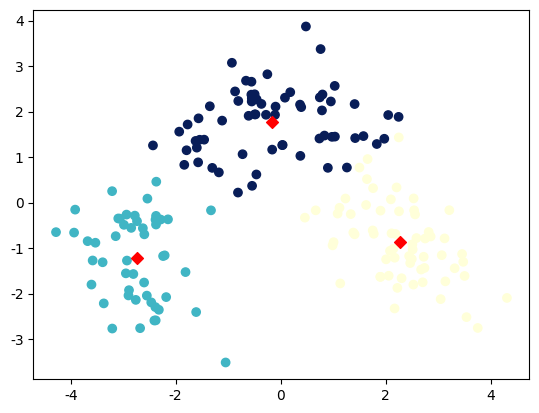

In [ ]:
plt.scatter(df['pca_x'], df['pca_y'], c= df['cluster'], cmap = 'YlGnBu')
plt.scatter(center[:,0], center[:,1], c= 'red', marker= 'D')
plt.show()

## 적절한 군집의 수, 즉 k를 어떻게 정할까?

- K-Means 알고리즘의 단점 중 하나는 클러스터의 개수를 사전에 지정해야 한다는 점이다.
- 군집알고리즘에서 적절한 k를 찾기 위한 완벽한 방법은 없다.
- 대표적인 방법중 하나가 엘보우 방법

**Elbow Method**

- K-Means 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있다.
- 이 거리의 제곱의 합을 inertia라고 부른다.
- inertia(이너셔): 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값
- 클러스터의 개수가 늘어나면 클러스터 개개의 거리의 크기는 줄어든다.(이너셔도 줄어든다)
- 엘보우 방법은 클러스터의 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터의 수를 찾는다.
- 클러스터의 개수를 증가시키면서 이너셔를 시각화하면 감소하는 속도가 꺾이는 지점이 있다. 이 지점부터 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 변화되지 않는다. 즉 이너셔가 크게 줄어들지 않는다. 이 지점이 팔꿈치 모양과 같아서 엘보우 방법이라고 부른다.

**용어 정리**

- 클러스터(cluster): 비슷한 특성을 가진 데이터끼리 묶는 것
- 클러스터링(clustering): 데이터들을 군집으로 묶어주는 작업
- 중심점, 도심(centeroid): 클러스터의 중심

In [ ]:
inertia = []

for k in range(2, 16):
    km = KMeans(n_clusters= k, random_state= 200)
    km.fit(data)
    iner = km.inertia_
    inertia.append(iner)

    print('군집수: ', k, '', '이너셔: ', iner)

군집수:  2  이너셔:  628.7883507554768
군집수:  3  이너셔:  259.50938075119296
군집수:  4  이너셔:  192.39061530234832
군집수:  5  이너셔:  155.06920474891703
군집수:  6  이너셔:  123.43287973008756
군집수:  7  이너셔:  99.24814548387026
군집수:  8  이너셔:  90.05279491709489
군집수:  9  이너셔:  80.742869175919
군집수:  10  이너셔:  73.42282923968264
군집수:  11  이너셔:  65.34374421996384
군집수:  12  이너셔:  59.44921293992758
군집수:  13  이너셔:  57.45019032472243
군집수:  14  이너셔:  51.07165420285432
군집수:  15  이너셔:  48.1365746012543


In [ ]:
inertia = np.array(inertia)

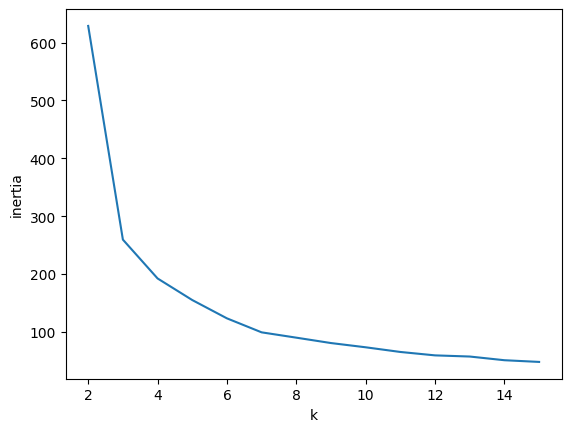

In [ ]:
plt.plot(range(2,16), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

- 2에서 4 사이 = 군집수 3개가 딱 좋다는것